In [1]:
%load_ext autoreload
%autoreload 2
from wbfm.utils.projects.finished_project_data import ProjectData
import numpy as np
import matplotlib.pyplot as plt

font = {'font.size': 14}
plt.rcParams.update(font)


Bad key "text.kerning_factor" on line 4 in
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [99]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/project_config.yaml"
# fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/project_config.yaml"
# fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/project_config.yaml"
project_data1 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/3-tracking/postprocessing/combined_3d_tracks-1.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
ConfigFile  : WARNING  Project does not have a behavior config file
ConfigFile  : WARNING  Did not find behavioral annotations
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/3-tracking/postprocessing/combined_3d_tracks-1.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/dat/2021-12-17_16-28-19_worm5-channel-0-pco_camera1bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_anno

# Plot example neuron with final filter settings

In [187]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/project_config.yaml"

project_data_beh = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/3-tracking/postprocessing/combined_3d_tracks---9.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
Annotations are already stable style
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/3-tracking/postprocessing/combined_3d_tracks---9.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/dat/2022-01-27_19-31_worm1_Ch0bigtiff.btf_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/dat/2022-01-27_19-31_worm1_Ch1bigtiff.btf_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/4-traces/red_traces.h5', '/scr

In [190]:
neuron = 'neuron_028'
# neuron = 'neuron_001'
opt = dict(channel_mode='linear_model', calculation_mode='integration', remove_outliers=True, filter_mode='linear_interpolation')
opt_old = opt.copy()
opt_old['channel_mode'] = 'ratio'

<Figure size 432x288 with 0 Axes>

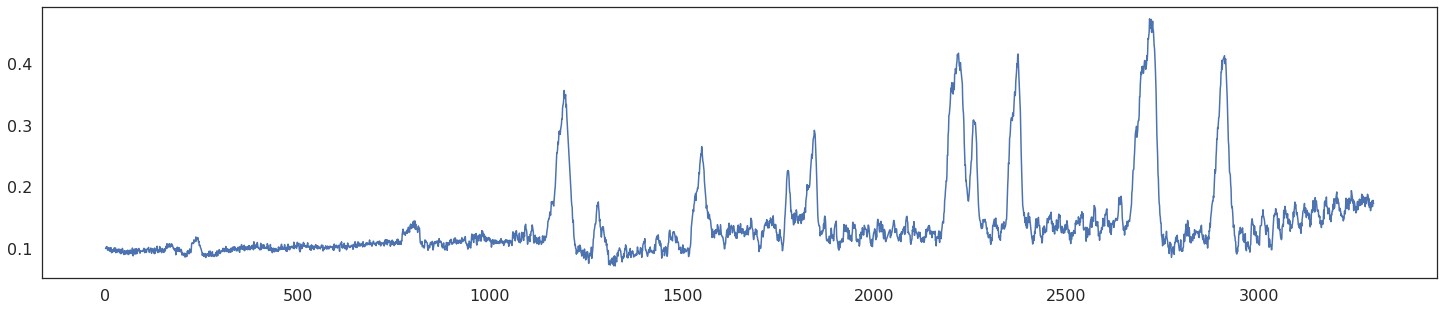

<Figure size 432x288 with 0 Axes>

In [193]:
# Old method: ratio
plt.figure(figsize=(25, 5))
t, y = project_data_beh.calculate_traces(neuron_name=neuron, **opt_old)
plt.plot(t, y)
plt.figure('Example trace')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

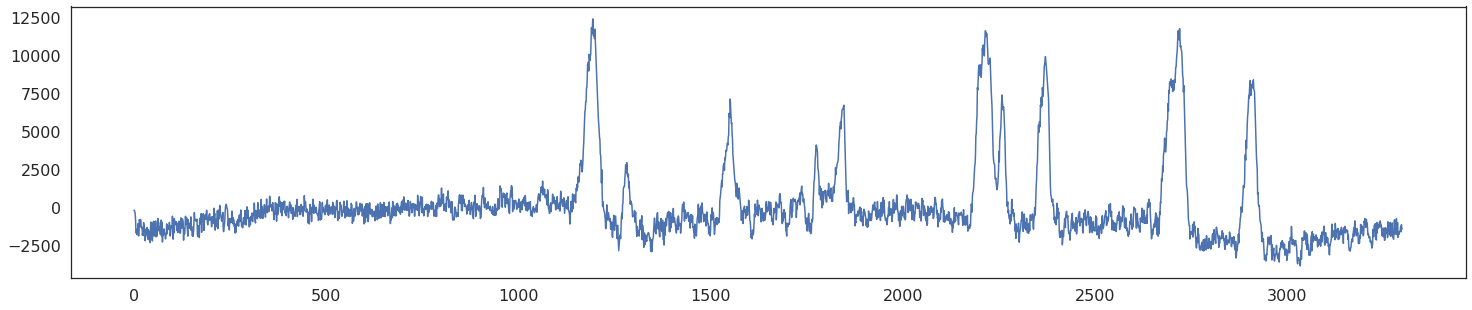

<Figure size 432x288 with 0 Axes>

In [194]:
plt.figure(figsize=(25, 5))
t, y = project_data_beh.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

In [234]:
project_data_beh._trace_plotter.background_per_pixel = 80

# names = project_data_beh.finished_neuron_names[:-1]

df_traces = project_data_beh._trace_plotter.calculate_traces_full_dataframe()#names=names)
df_traces.dropna(axis=1, thresh=int(0.9*df_traces.shape[0]), inplace=True)

In [235]:
int(0.9*df_traces.shape[1])

95

In [236]:
df_traces.count()

neuron_001    3300
neuron_002    3300
neuron_003    3300
neuron_004    3258
neuron_005    3300
              ... 
neuron_138    3299
neuron_139    3300
neuron_140    3300
neuron_141    3300
neuron_142    3300
Length: 106, dtype: int64

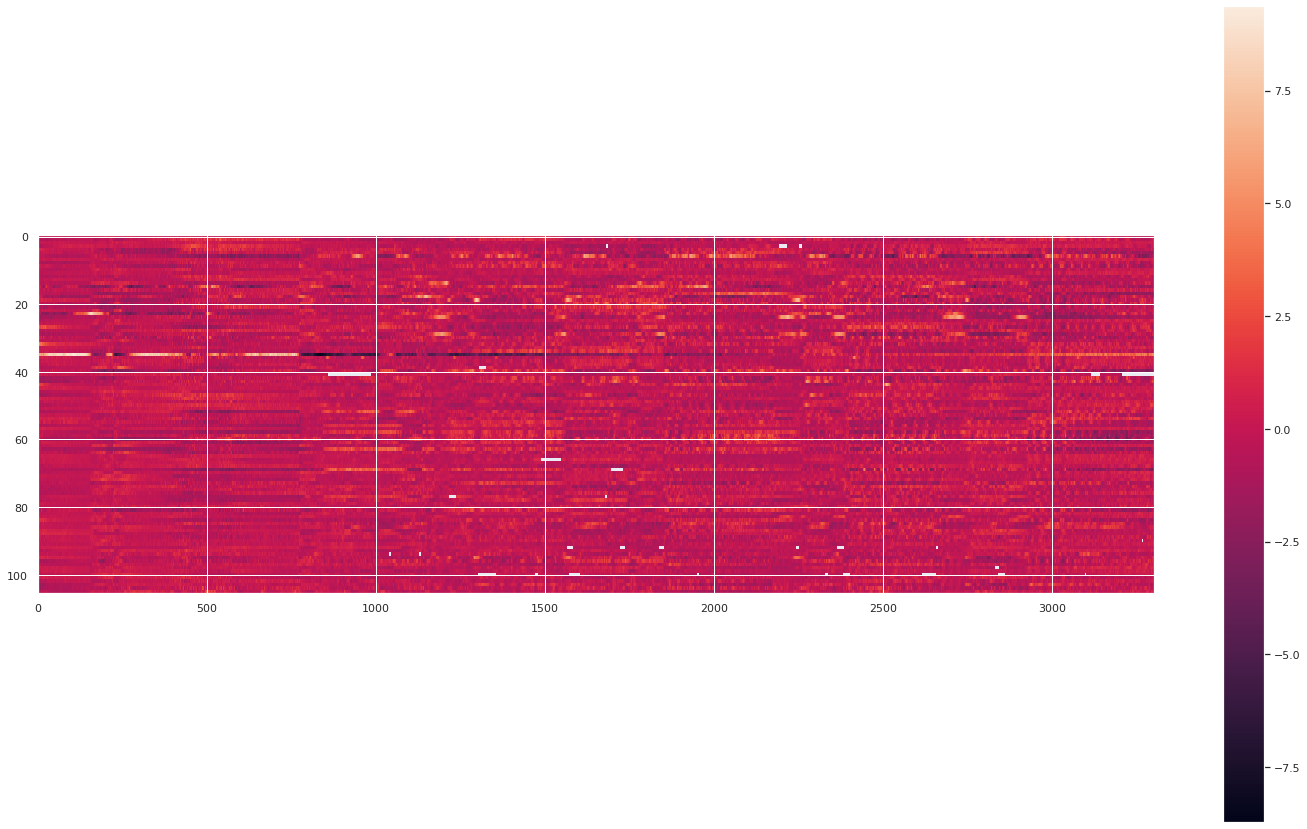

In [237]:
plt.figure(figsize=(25,15))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df_traces.T

data_scaled = scaler.fit_transform(data)

plt.imshow(data_scaled, aspect=10)
plt.colorbar()

# Plot a clustered heatmap
From:
https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [238]:
import seaborn as sns; sns.set_theme(color_codes=True)
from wbfm.utils.general.postprocessing.position_postprocessing import impute_missing_values_in_dataframe

In [239]:
df_imputed = impute_missing_values_in_dataframe(df_traces, d=int(0.9*df_traces.shape[1]))

In [240]:
int(0.9*df_traces.shape[1])

95

In [241]:
# scaler = StandardScaler()
# data = df_imputed.T

# data_scaled = scaler.fit_transform(data)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


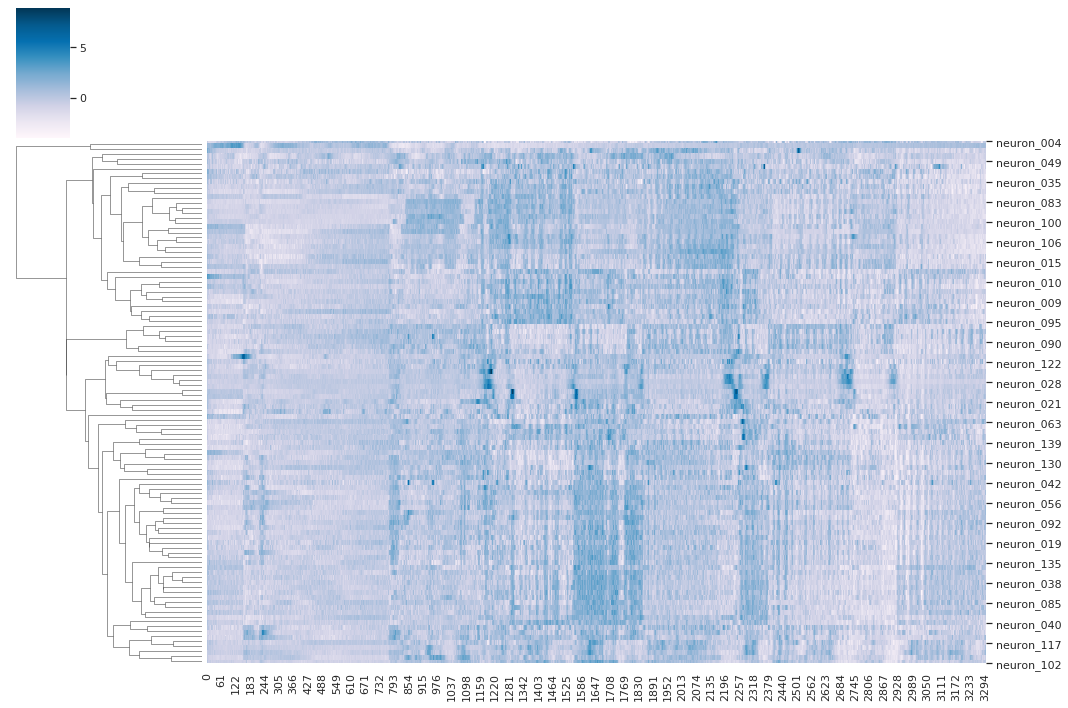

In [242]:
g = sns.clustermap(df_imputed.T, col_cluster=False, #vmin=-2, vmax=3,
                   metric="correlation", z_score=0, cmap='PuBu', figsize=(15,10))
# g.savefig('Ceneuro_heatplot.png')

## Look at some of the unusual clustered ones

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

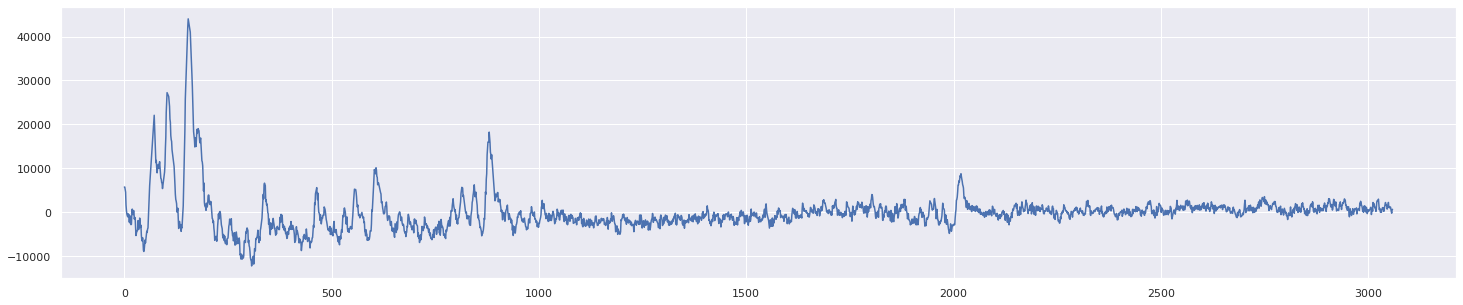

<Figure size 432x288 with 0 Axes>

In [116]:
neuron = 'neuron_028'

plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

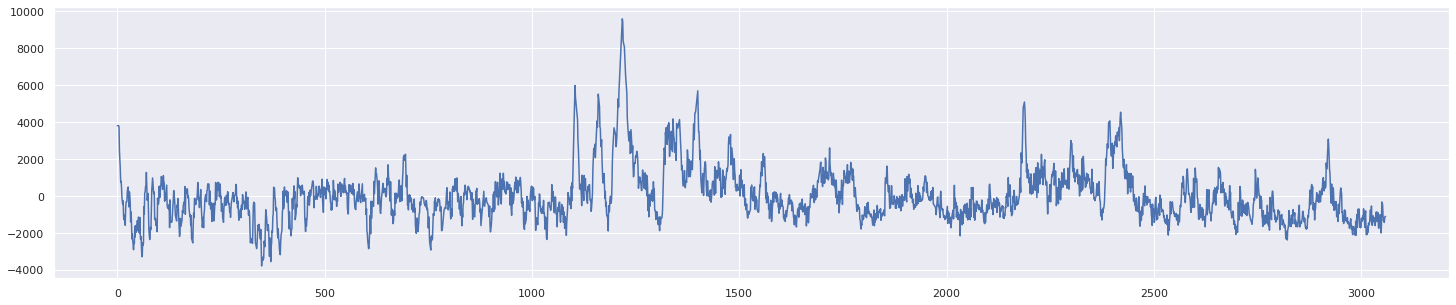

<Figure size 432x288 with 0 Axes>

In [118]:
neuron = 'neuron_128'

plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

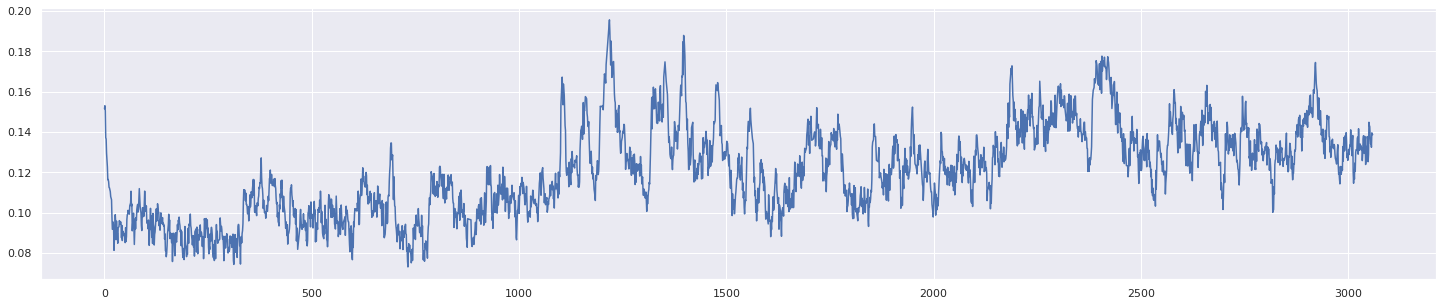

<Figure size 432x288 with 0 Axes>

In [120]:
neuron = 'neuron_128'

plt.figure(figsize=(25, 5))
project_data1.background_per_pixel = 80
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt_old)
plt.plot(t, y)
plt.figure('Example trace')

# PCA plot of the data (subset=high enough activity)

In [244]:
from sklearn.decomposition import PCA

In [261]:
df_imputed.max().mean()

4144.27559543988

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


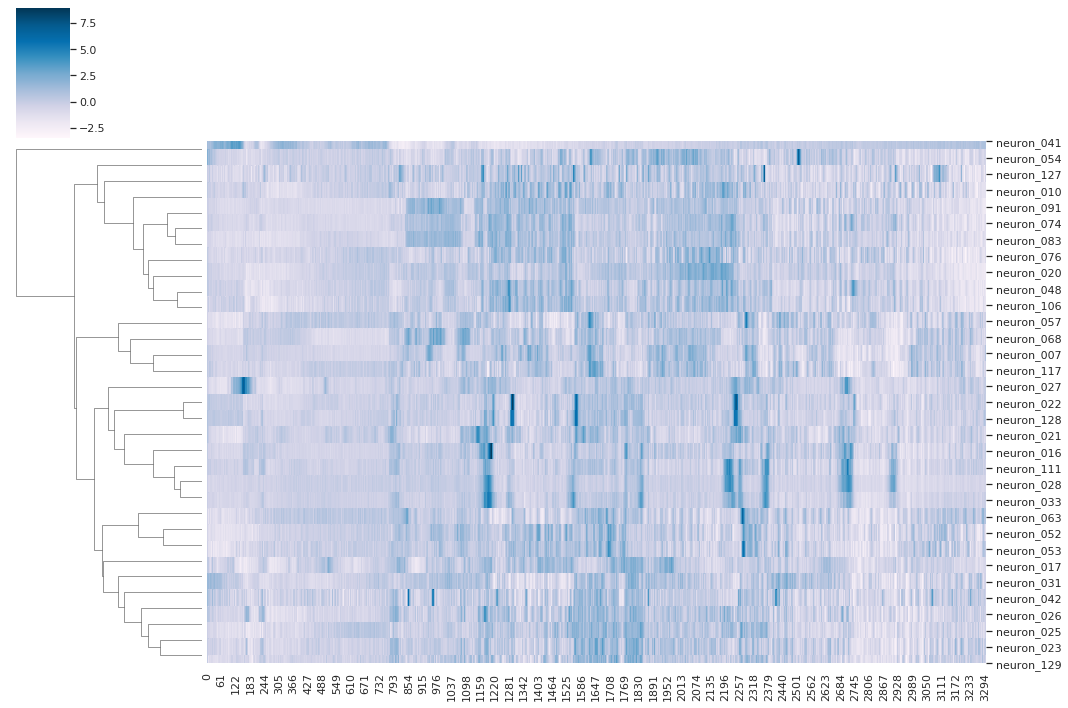

In [272]:
df_subset = df_imputed.loc[:, df_imputed.max() > 4200]
g = sns.clustermap(df_subset.T, col_cluster=False, #vmin=-2, vmax=3,
                   metric="correlation", z_score=0, cmap='PuBu', figsize=(15,10))

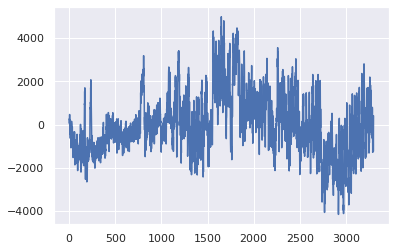

In [273]:
plt.plot(df_subset['neuron_023'])

In [274]:
pca = PCA(n_components=10, whiten=False)
# df_pca = pca.fit_transform(df_imputed)
df_pca = pca.fit_transform(df_subset)

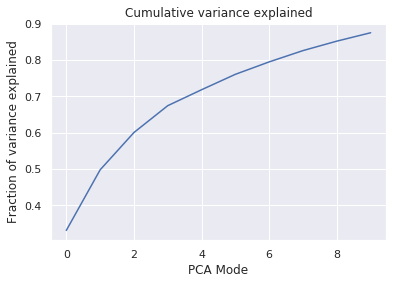

In [275]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative variance explained")
plt.xlabel("PCA Mode")
plt.ylabel("Fraction of variance explained")

plt.savefig("Ceneuro_PCA.png")

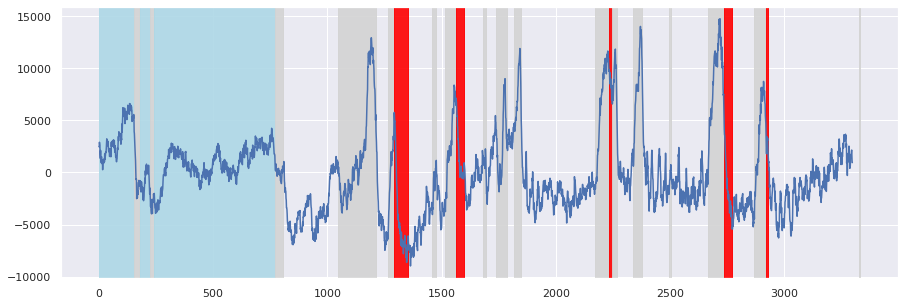

In [277]:

fig = plt.figure(figsize=(15,5))
plt.plot(df_pca[:, 1])
project_data_beh.shade_axis_using_behavior()

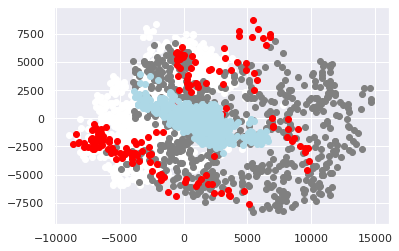

In [282]:
import itertools

colors = itertools.cycle(['white', 'gray', 'red', 'lightblue'])
values = project_data_beh.worm_posture_class.behavior_annotations_fluorescence_fps[:3300]
unique_values = np.unique(values)

for val in unique_values:
    ind = values==val
    # plt.scatter(df_pca[ind, 0], df_pca[ind, 1], color=next(colors))
    plt.scatter(df_pca[ind, 1], df_pca[ind, 2], color=next(colors))

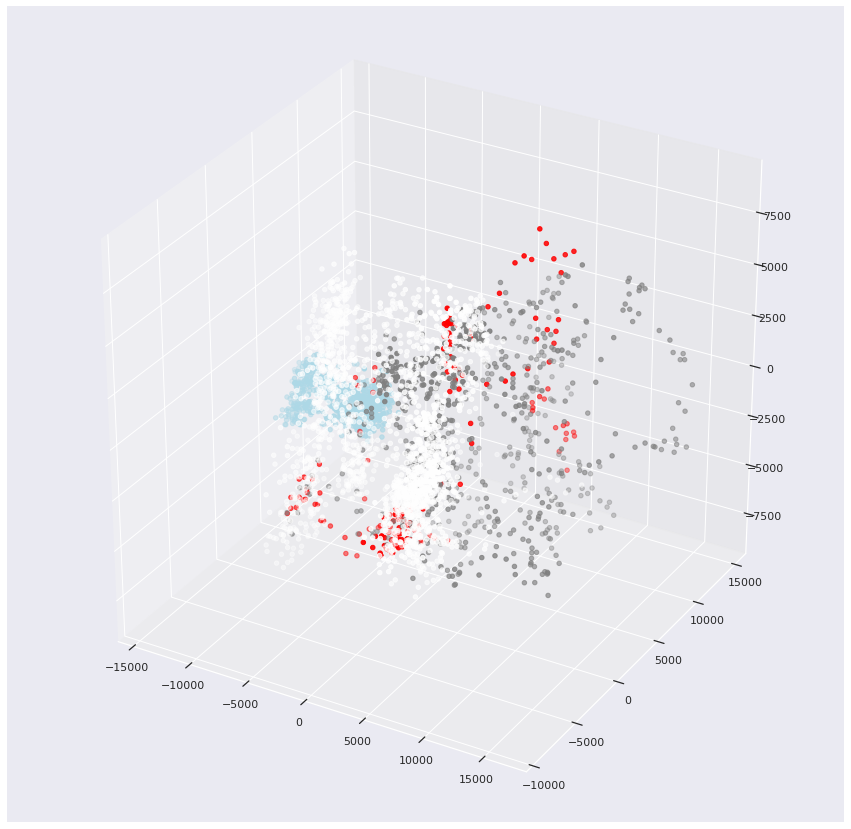

In [283]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
# p = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 3], c=np.arange(len(df_pca[:, 0])), s=60)
# p = ax.scatter(df_pca[:, 0], df_pca[:, 1], df_pca[:, 2],  c=project_data_beh.worm_posture_class.behavior_annotations_fluorescence_fps[:3300])
# fig.colorbar(p)

for val in unique_values:
    ind = values==val
    # plt.scatter(df_pca[ind, 0], df_pca[ind, 1], color=next(colors))
    ax.scatter(df_pca[ind, 0], df_pca[ind, 1], df_pca[ind, 2], color=next(colors))

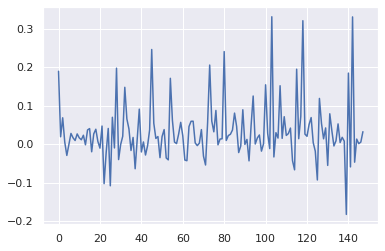

In [140]:
plt.plot(pca.components_[3, :])

# Same as above, but with delta f over f

In [216]:
neuron = 'neuron_001'
opt = dict(channel_mode='ratio_df_over_f_10', calculation_mode='integration', remove_outliers=True, filter_mode='linear_interpolation')
project_data1.background_per_pixel = 75

names = project_data1.finished_neuron_names

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

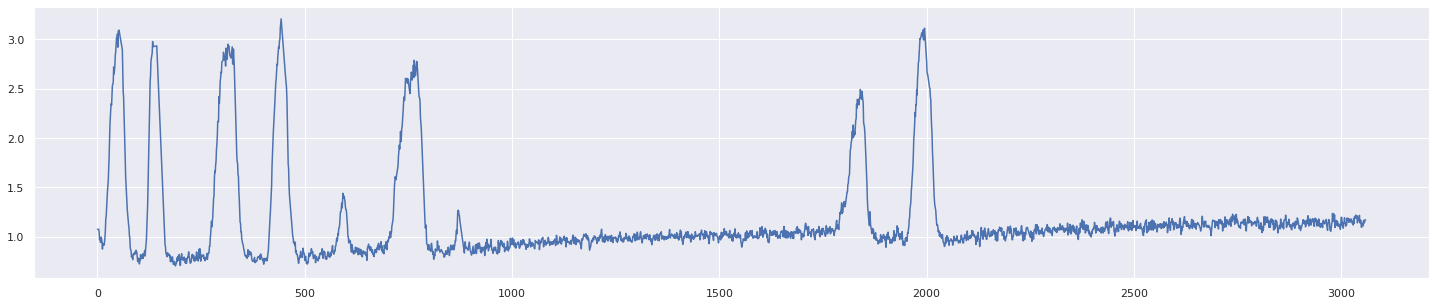

<Figure size 432x288 with 0 Axes>

In [194]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

In [217]:
# project_data1._trace_plotter.background_per_pixel = 80
df_traces = project_data1._trace_plotter.calculate_traces_full_dataframe(names=names)
df_traces.dropna(axis=1, thresh=2500, inplace=True)

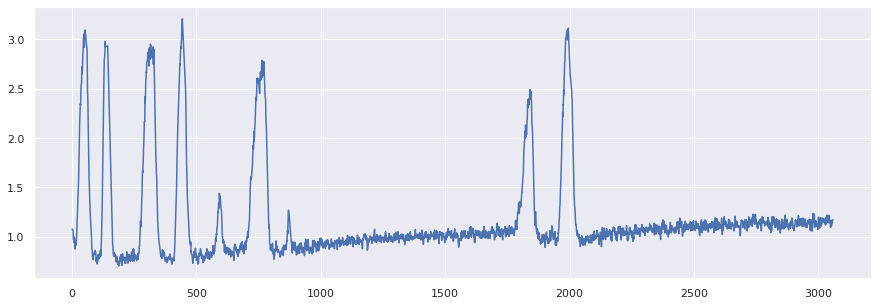

In [218]:
df_traces[neuron].plot(figsize=(15,5))

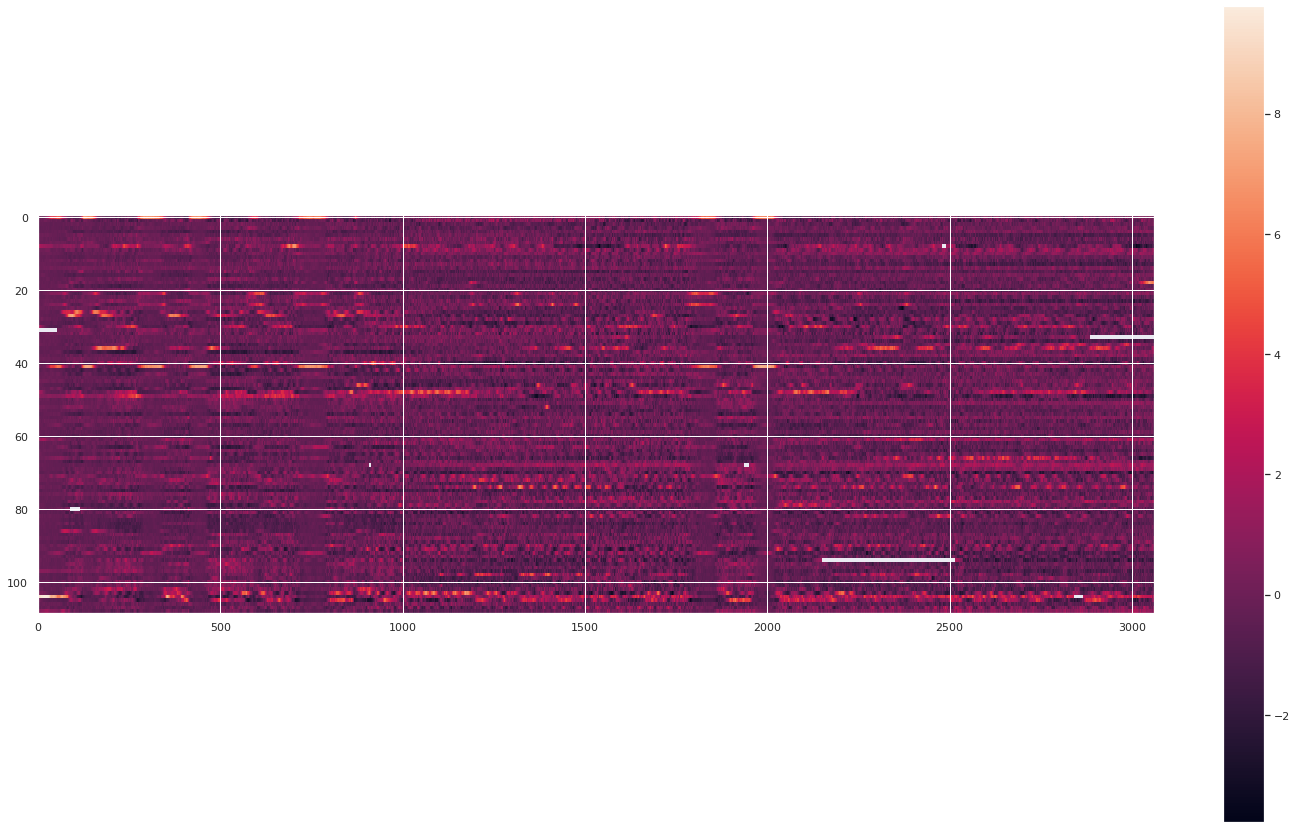

In [219]:
plt.figure(figsize=(25,15))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df_traces.T

data_scaled = scaler.fit_transform(data)

plt.imshow(data_scaled, aspect=10)
plt.colorbar()

# Plot a clustered heatmap
From:
https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [353]:
import seaborn as sns; sns.set_theme(color_codes=True)
from wbfm.utils.general.postprocessing.position_postprocessing import impute_missing_values_in_dataframe

In [354]:
df_imputed = impute_missing_values_in_dataframe(df_traces, d=140)

In [355]:
# scaler = StandardScaler()
# data = df_imputed.T

# data_scaled = scaler.fit_transform(data)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


KeyboardInterrupt: 

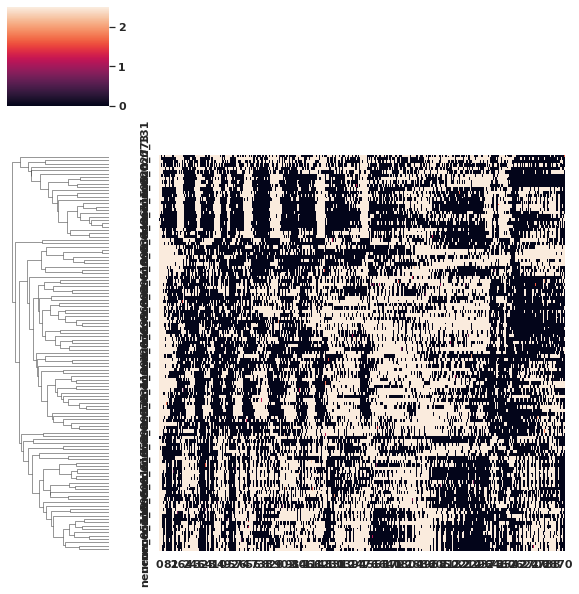

In [356]:
g = sns.clustermap(df_imputed.T, col_cluster=False, vmin=0, vmax=2.5,
                   metric="correlation")

# Heatmap for gfp worm

In [135]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/project_config.yaml"

project_data_gfp = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/3-tracking/postprocessing/combined_3d_tracks-4.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : WARNING  Project does not have a behavior config file
ConfigFile  : WARNING  Did not find behavioral annotations
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/3-tracking/postprocessing/combined_3d_tracks-4.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/dat/2022-04-09_14-51_ZIM2319_worm5_Ch0bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/dat/2022-04-09_14-51_ZIM2319_worm5_Ch1bigtiff_preprocessed.zarr.zip

In [138]:
neuron = 'neuron_002'
opt = dict(channel_mode='linear_model', calculation_mode='integration', remove_outliers=True, filter_mode='linear_interpolation')
opt_old = opt.copy()
opt_old['channel_mode'] = 'ratio'

<Figure size 432x288 with 0 Axes>

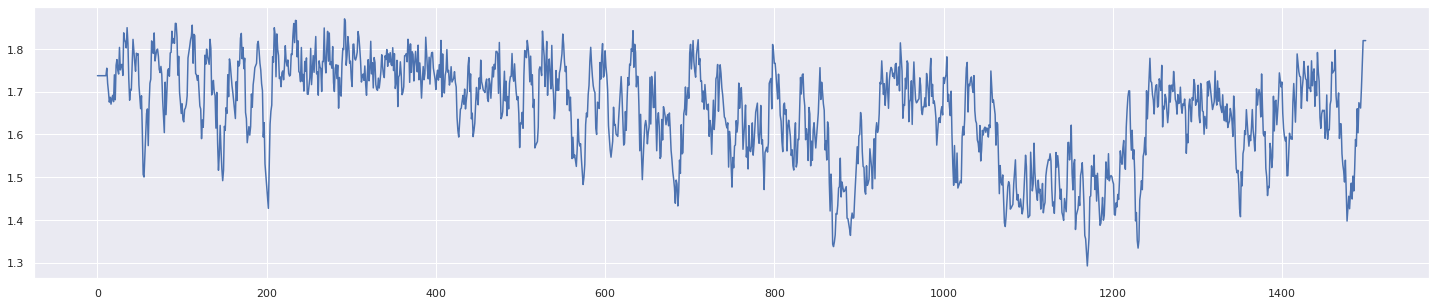

<Figure size 432x288 with 0 Axes>

In [139]:
# Old method: ratio
plt.figure(figsize=(25, 5))
t, y = project_data_gfp.calculate_traces(neuron_name=neuron, **opt_old)
plt.plot(t, y)
plt.figure('Example trace')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

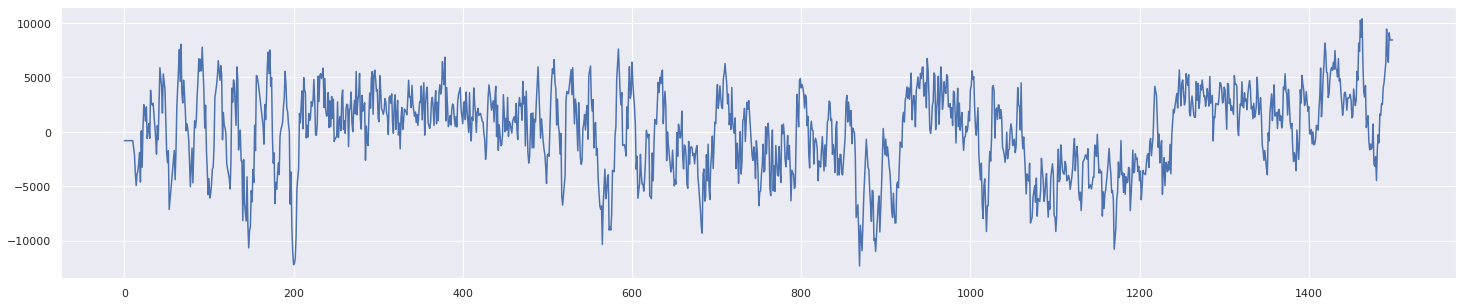

<Figure size 432x288 with 0 Axes>

In [140]:
plt.figure(figsize=(25, 5))
t, y = project_data_gfp.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

In [149]:
project_data_gfp._trace_plotter.background_per_pixel = 80

names = project_data_gfp.finished_neuron_names

df_traces = project_data_gfp._trace_plotter.calculate_traces_full_dataframe(names=names)
df_traces.dropna(axis=1, thresh=1000, inplace=True)

In [152]:
# df_traces

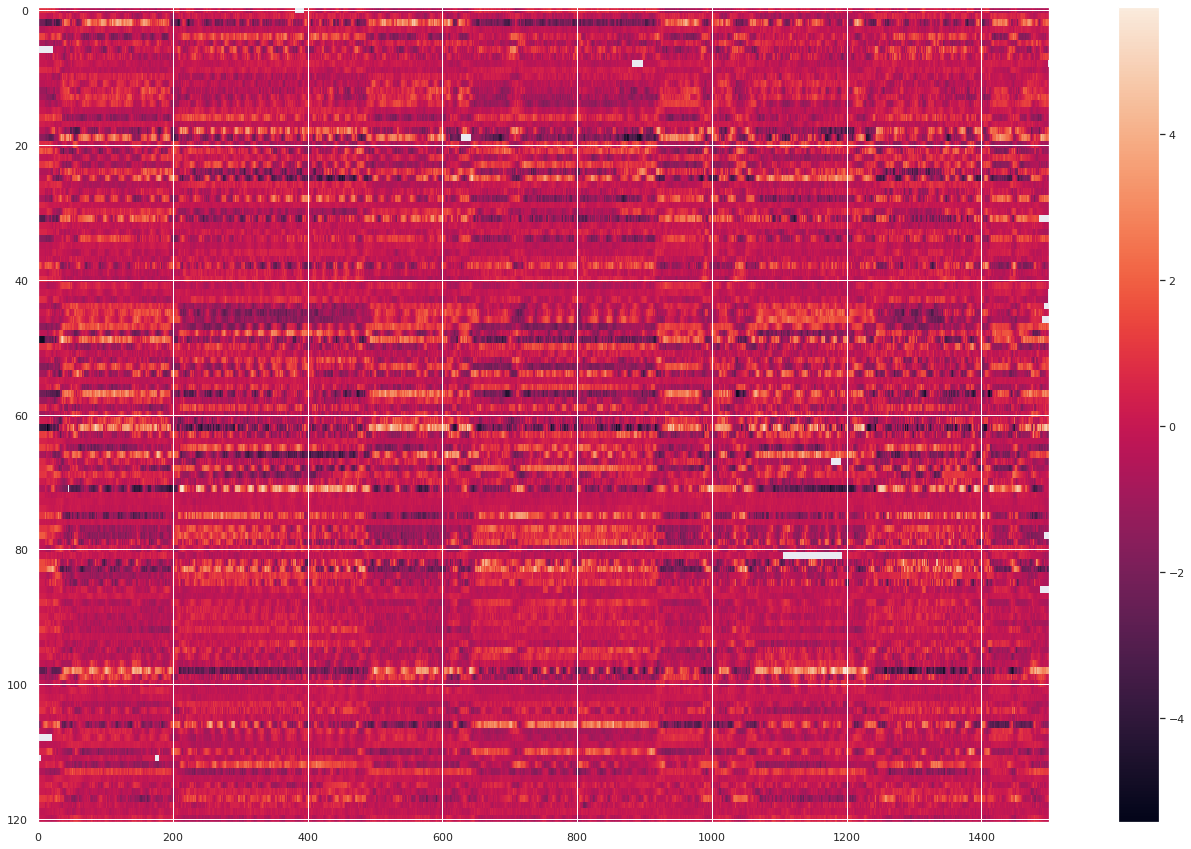

In [153]:
plt.figure(figsize=(25,15))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df_traces.T

data_scaled = scaler.fit_transform(data)

plt.imshow(data_scaled, aspect=10)
plt.colorbar()

# Plot a clustered heatmap
From:
https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [154]:
import seaborn as sns; sns.set_theme(color_codes=True)
from wbfm.utils.general.postprocessing.position_postprocessing import impute_missing_values_in_dataframe

In [155]:
df_imputed = impute_missing_values_in_dataframe(df_traces, d=int(0.9*df_traces.shape[1]))

In [156]:
# scaler = StandardScaler()
# data = df_imputed.T

# data_scaled = scaler.fit_transform(data)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


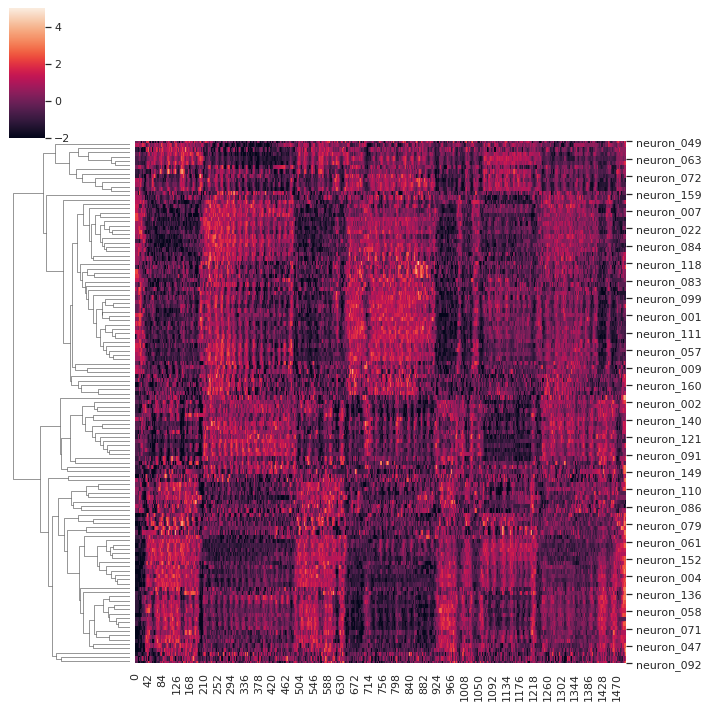

In [157]:
g = sns.clustermap(df_imputed.T, col_cluster=False, vmin=-2, vmax=5,
                   metric="correlation", z_score=0)

In [239]:
df_subset = df_imputed.loc[:, df_imputed.max() > 1.0]

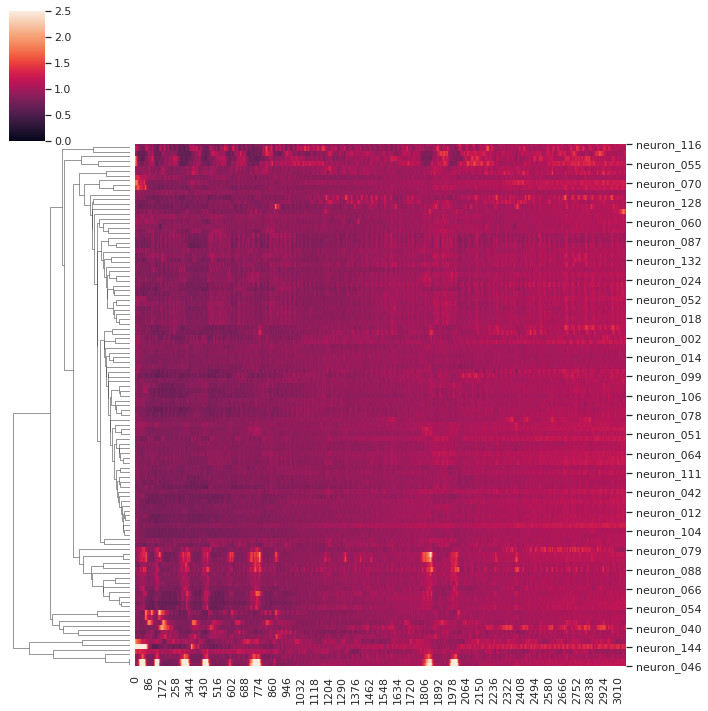

In [240]:
g = sns.clustermap(df_subset.T, col_cluster=False, vmin=0, vmax=2.5,
                   metric="correlation")

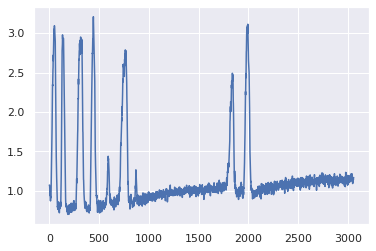

In [241]:
df_subset['neuron_001'].plot()

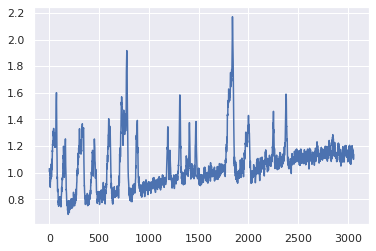

In [242]:
df_subset['neuron_026'].plot()

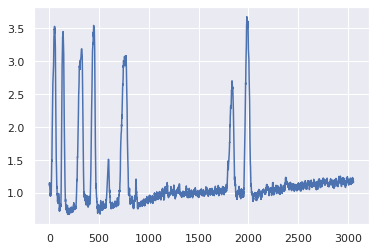

In [243]:
df_subset['neuron_046'].plot()

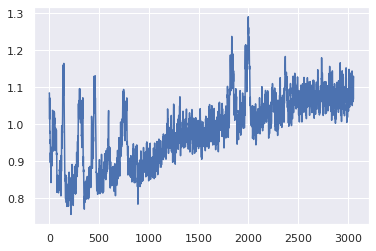

In [245]:
df_subset['neuron_008'].plot()

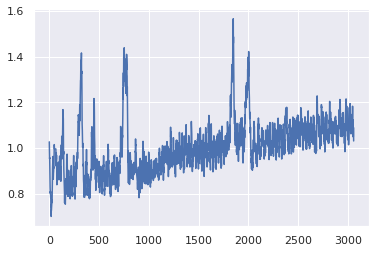

In [246]:
df_subset['neuron_034'].plot()

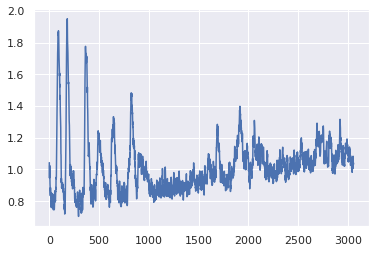

In [247]:
df_subset['neuron_029'].plot()

In [250]:
project_data1.red_traces['neuron_002']['area']

0       547.0
1       639.0
2       660.0
3       529.0
4       668.0
        ...  
3055    582.0
3056    542.0
3057    509.0
3058    567.0
3059      NaN
Name: area, Length: 3060, dtype: float64

# Plot neural network training data

In [152]:
from pathlib import Path
import pandas as pd
from wbfm.utils.tracklets.high_performance_pandas import get_names_from_df
import seaborn as sns
import os

folder_name = Path("/home/charles/Current_work/presentations/Ceneuro2022/")

In [153]:
df_track = []
df_tracklets = []

for item in folder_name.iterdir():
    if not str(item.name).endswith('.csv'):
        continue
    out = pd.read_csv(item)
    t = out['Step']
    cols = out.columns
    y = out[cols[1]]
    
    name = item.stem.split('_')[0]
    this_df = pd.DataFrame(index=t, data=list(y), columns=[name])
    
    if 'tracks' in item.stem:
        df_track.append(this_df)
    else:
        df_tracklets.append(this_df)

df_track = pd.concat(df_track, axis=1)
df_tracklets = pd.concat(df_tracklets, axis=1)

In [178]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

sns.set_theme(style="white")

SMALL_SIZE = 16
MEDIUM_SIZE = 22
BIGGER_SIZE = 42

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

TO_SAVE = True

opt_track = dict(x=df_track.index / np.max(df_track.index), data=df_track, lw=4, label="Time-independent (Tracker)", color='#82B366')
opt_tracklets = dict(x=df_tracklets.index / np.max(df_tracklets.index), data=df_tracklets, lw=4, label="Time-adjacent (Tracklets)", color='#9673A6')

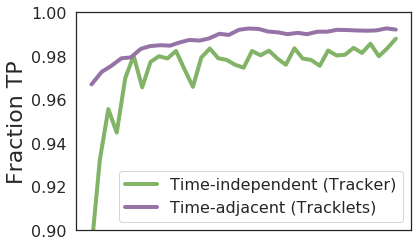

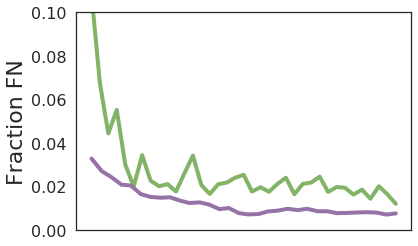

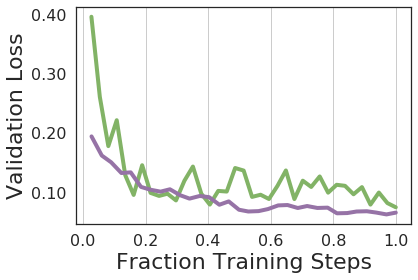

In [186]:
# fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

sns.lineplot(y='tp', **opt_track)
ax = sns.lineplot(y='tp', **opt_tracklets)
plt.legend()
plt.ylabel("Fraction TP");
plt.xlabel("")
plt.xticks([])
plt.ylim([0.9, 1.0])
ax.grid(axis='x')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

if TO_SAVE:
    fname = 'tp.png'
    fname = os.path.join(folder_name, fname)
    ax.figure.tight_layout()
    ax.figure.savefig(fname)

##
# sns.lineplot(y='fp', **opt_track)
# sns.lineplot(y='fp', **opt_tracklets)
# # plt.legend()
# plt.ylabel("Fraction False Positives");
# plt.xlabel("Fraction Training Steps")
# plt.ylim([0.0, 0.1])
# plt.show()

# fname = 'fp.png'
# fname = os.path.join(folder_name, fname)
# plt.savefig(fname)

##
# plt.subplot(312)
sns.lineplot(y='fn', **opt_track)
ax = sns.lineplot(y='fn', **opt_tracklets)
ax.set_ylabel("Fraction FN");
ax.set_xlabel("")
plt.xticks([])
ax.get_legend().remove()
ax.set_ylim([0.0, 0.1])
plt.grid(axis='x')
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.show()

if TO_SAVE:
    fname = 'fn.png'
    fname = os.path.join(folder_name, fname)
    ax.figure.tight_layout()
    ax.figure.savefig(fname)

##
# plt.subplot(313)
sns.lineplot(y='val', **opt_track)
ax = sns.lineplot(y='val', **opt_tracklets)
ax.get_legend().remove()
ax.set_ylabel("Validation Loss");
ax.set_xlabel("Fraction Training Steps")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.grid(axis='x')
# plt.ylim([0.0, 0.1])
plt.show()

if TO_SAVE:
    fname = 'val.png'
    fname = os.path.join(folder_name, fname)
    ax.figure.tight_layout()
    ax.figure.savefig(fname)

# Plot tracklets + raw global tracker

Note: need to use one of my new projects, because this is a custom class that 

In [2]:
# fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/project_config.yaml"
# fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/project_config.yaml"
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/bright_worm6/project_config.yaml"
project_data2 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     Set up logger with name: ConfigFile
File for mode automatic exists at precendence: 1/3
Read data from: /scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/bright_worm6/3-tracking/postprocessing/combined_3d_tracks-1.h5
ConfigFile  : INFO     Starting threads to read data...
ConfigFile  : INFO     behavior_fname not found; searching
ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
ConfigFile  : WARNING  Project does not have a behavior config file
ConfigFile  : WARNING  Did not find behavioral annotations
ConfigFile  : INFO     Read all data from files: ['/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/bright_worm6/3-tracking/postprocessing/combined_3d_tracks-1.h5', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/bright_worm6/dat/2021-12-17_16-54-06_worm6-channel-0-pco_camera1bigtiff_preprocessed.zarr.zip', '/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/bright_worm6/dat/2021-12-1

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/bright_worm6 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [234]:
folder_name = Path("/home/charles/Current_work/presentations/Ceneuro2022/")

In [159]:
tracked_worm = project_data2.tracked_worm_class

ConfigFile  : WARNING  Loading tracked worm object for the first time, may take a while


In [218]:
# # neuron = 'neuron_140'
# neuron = 'neuron_056'
# # font = {'font.size': 14}
# # plt.rcParams.update(font)

# fig = tracked_worm.plot_tracklets_for_neuron(neuron, with_names=False, with_confidence=False)
# plt.xlim([0, 3000])
# plt.show()

In [229]:
import matplotlib.pyplot as plt

sns.set_theme(style="white")

SMALL_SIZE = 22
MEDIUM_SIZE = 18
BIGGER_SIZE = 42

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

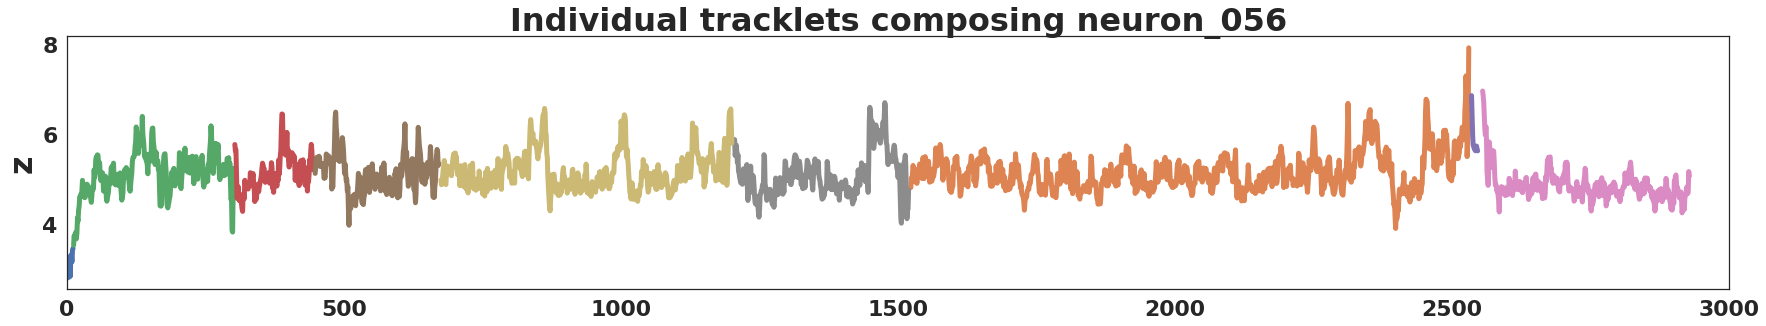

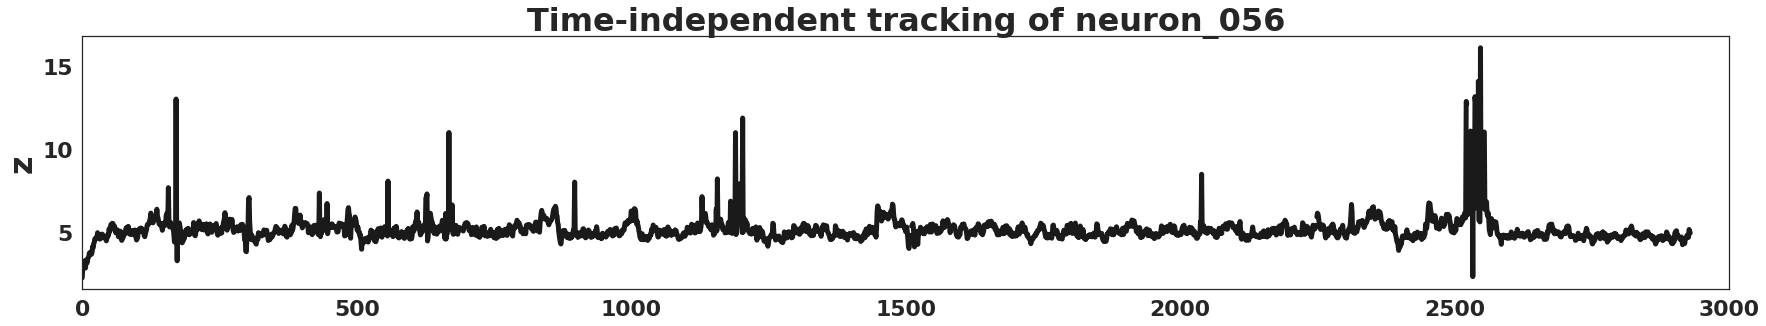

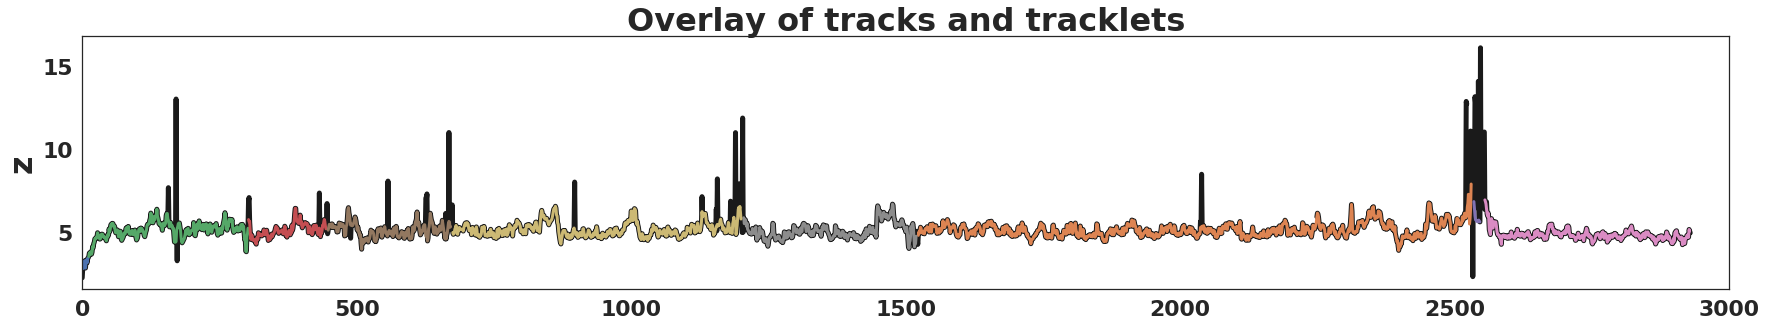

In [239]:
tracklet_list, tracklet_network_names = tracked_worm.get_tracklets_and_network_names_for_neuron(neuron)

plot_field = 'z'
tspan = np.arange(tracklet_list[0].shape[0])

fig = plt.figure(figsize=(25, 5))
for t in tracklet_list:
    y = list(t[plot_field])
    sns.lineplot(x=tspan, y=y, lw=5)

fontdict = fontdict={'size':32, 'weight':'bold'}
    
plt.xlim([0, 3000])
plt.title(f"Individual tracklets composing {neuron}", **fontdict)
plt.ylabel(plot_field, **fontdict)

plt.tight_layout()
fname = os.path.join(folder_name, 'tracklets.png')
plt.savefig(fname)

##
fig = plt.figure(figsize=(25, 5))

y_global = project_data2.intermediate_global_tracks[neuron][plot_field]
plt.plot(y_global, 'k', lw=5)

plt.xlim([0, 3000])
plt.title(f"Time-independent tracking of {neuron}", **fontdict)
plt.ylabel(plot_field, **fontdict)

plt.tight_layout()
fname = os.path.join(folder_name, 'track.png')
plt.savefig(fname)


## Now do an overlay

fig = plt.figure(figsize=(25, 5))

y_global = project_data2.intermediate_global_tracks[neuron][plot_field]
plt.plot(y_global, 'k', lw=5)

for t in tracklet_list:
    y = list(t[plot_field])
    sns.lineplot(x=tspan, y=y, lw=3)


fontdict = fontdict={'size':32, 'weight':'bold'}
    
plt.xlim([0, 3000])
plt.title(f"Overlay of tracks and tracklets", **fontdict)
plt.ylabel(plot_field, **fontdict)

plt.tight_layout()
fname = os.path.join(folder_name, 'track_tracklet_overlay.png')
plt.savefig(fname)

# Heatmap for this worm

In [17]:
neuron = 'neuron_111'
# neuron = 'neuron_103'
opt = dict(channel_mode='linear_model', calculation_mode='integration', remove_outliers=True, filter_mode='rolling_mean')
opt_old = opt.copy()
opt_old['channel_mode'] = 'ratio'

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

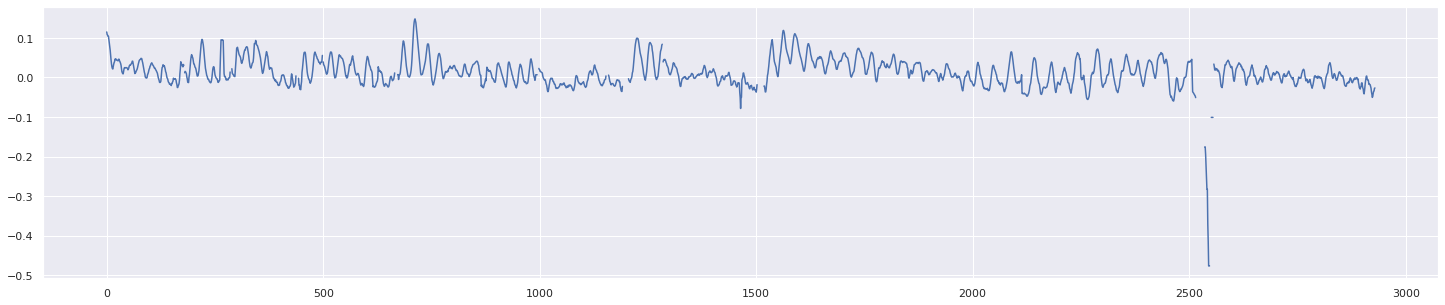

<Figure size 432x288 with 0 Axes>

In [18]:
# Old method: ratio
plt.figure(figsize=(25, 5))
t, y = project_data2.calculate_traces(neuron_name=neuron, **opt_old)
plt.plot(t, y)
plt.figure('Example trace')

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 432x288 with 0 Axes>

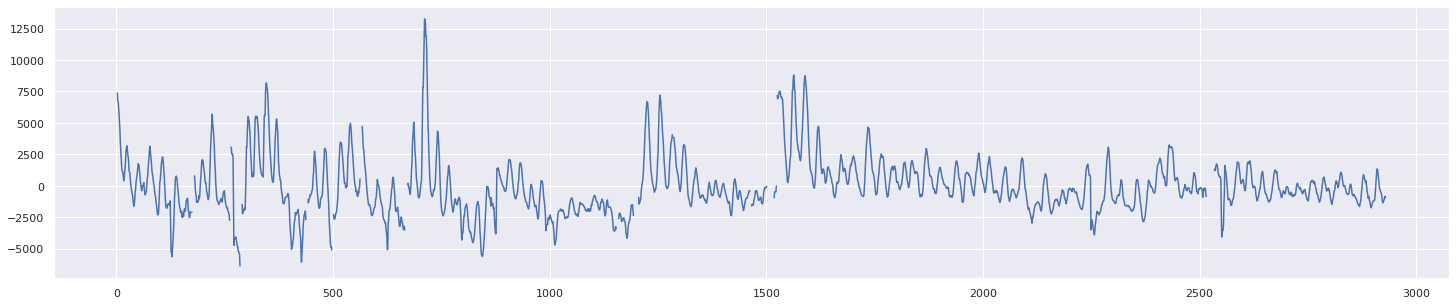

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(25, 5))
t, y = project_data2.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)
plt.figure('Example trace')

In [20]:
project_data2._trace_plotter.background_per_pixel = 80

df_traces = project_data2._trace_plotter.calculate_traces_full_dataframe()#names=names)
df_traces.dropna(axis=1, thresh=2500, inplace=True)

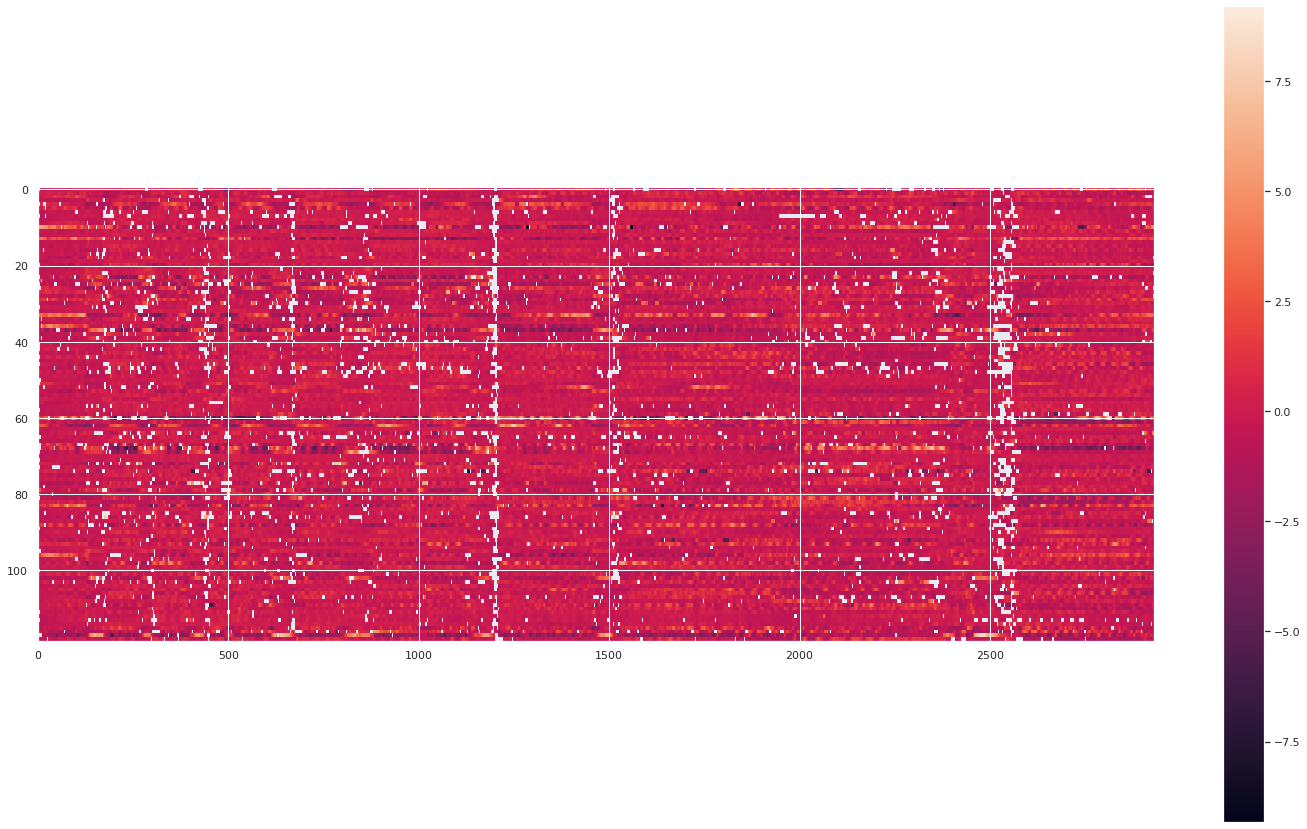

In [21]:
plt.figure(figsize=(25,15))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = df_traces.T

data_scaled = scaler.fit_transform(data)

plt.imshow(data_scaled, aspect=10)
plt.colorbar()

# Plot a clustered heatmap
From:
https://seaborn.pydata.org/generated/seaborn.clustermap.html

In [149]:
import seaborn as sns; sns.set_theme(color_codes=True)
import os
from pathlib import Path
from wbfm.utils.general.postprocessing.position_postprocessing import impute_missing_values_in_dataframe

In [150]:
folder_name = Path("/home/charles/Current_work/presentations/Ceneuro2022/")

In [24]:
df_imputed = impute_missing_values_in_dataframe(df_traces, d=int(0.95*df_traces.shape[1]))

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/ppca/_ppca.py:82: RuntimeWarning: divide by zero encountered in log
  det = np.log(np.linalg.det(Sx))


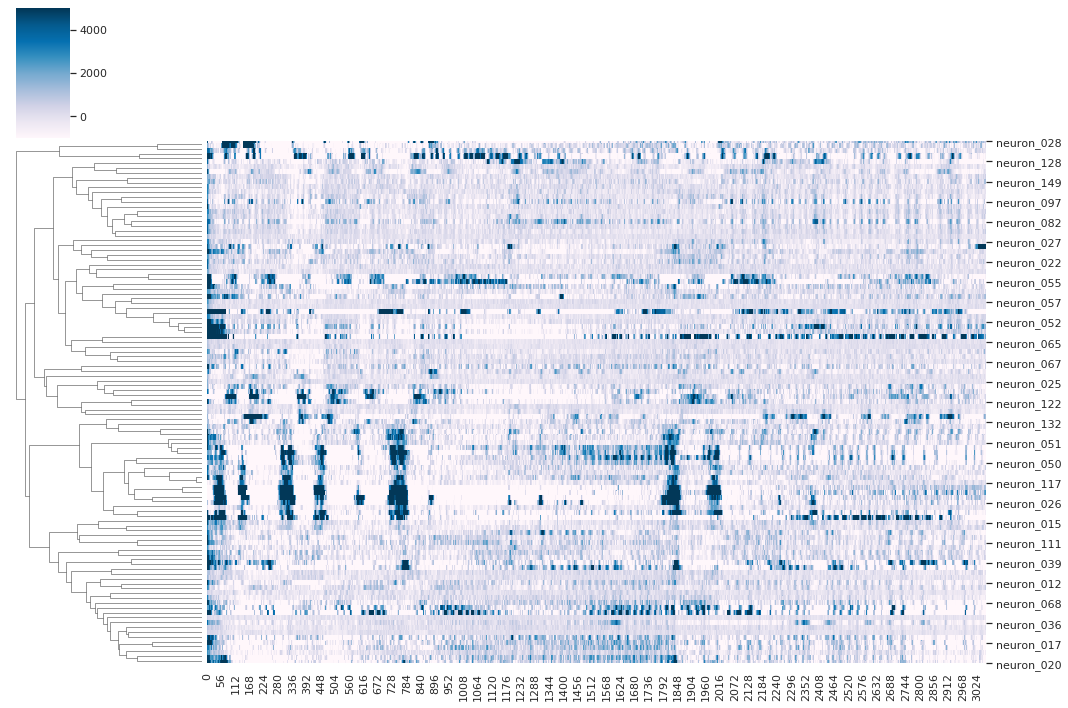

In [151]:
g = sns.clustermap(df_imputed.T, col_cluster=False, vmin=-1000, vmax=5000,
                   # z_score=0,
                   metric="correlation", cmap='PuBu', figsize=(15,10))
                   #cbar_kws = dict(use_gridspec=False,location="top"))

fname = os.path.join(folder_name, 'clustermap.png')
g.savefig(fname)

### Remove low std neurons

In [41]:

scaler = StandardScaler()
data_scaled = df_imputed.copy()

data_scaled = data_scaled.loc[:, data_scaled.std() > 1000]
data_scaled[:] = scaler.fit_transform(data_scaled.T).T

# data.std() > 1500

In [42]:
df_imputed.std()

neuron_001    1827.616982
neuron_003    1112.606363
neuron_004    1522.497239
neuron_005     741.745305
neuron_006    2506.420533
                 ...     
neuron_135     536.324816
neuron_137    1589.540873
neuron_139    1734.470188
neuron_140    5945.729142
neuron_146    1049.809344
Length: 119, dtype: float64

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


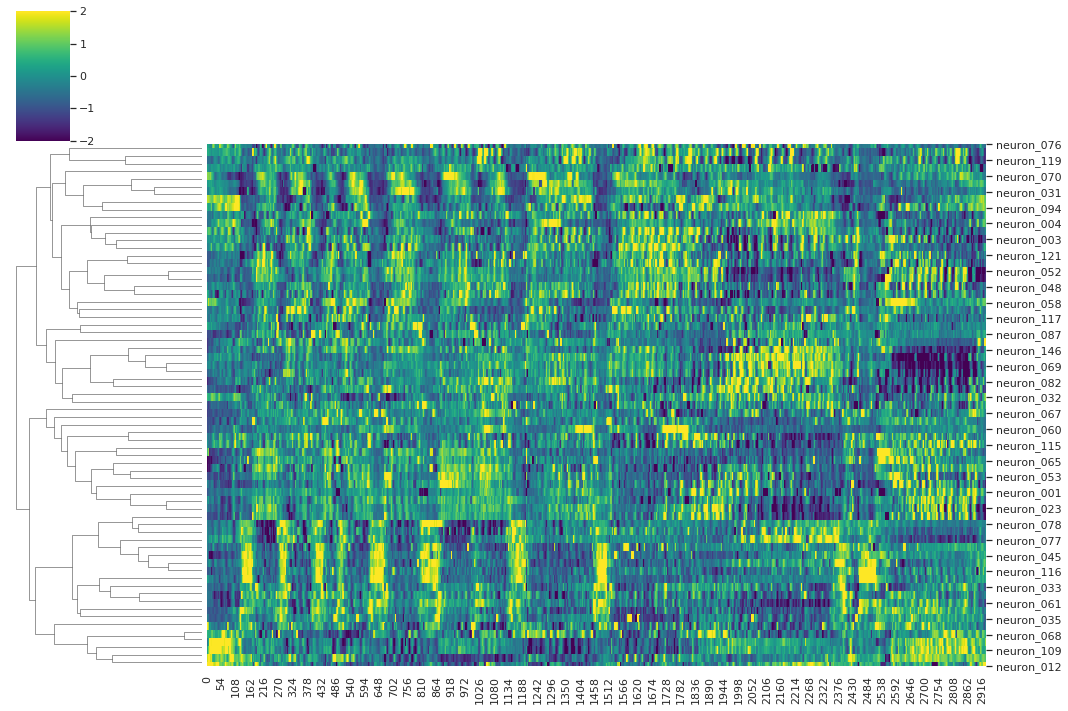

In [43]:
g = sns.clustermap(data_scaled.T, col_cluster=False, vmin=-2, vmax=2,
                   metric="correlation", z_score=0, cmap='viridis', figsize=(15,10))

### Do a band-stop filter to get rid of frequencies present in the red channel

In [28]:
from scipy.signal import wiener

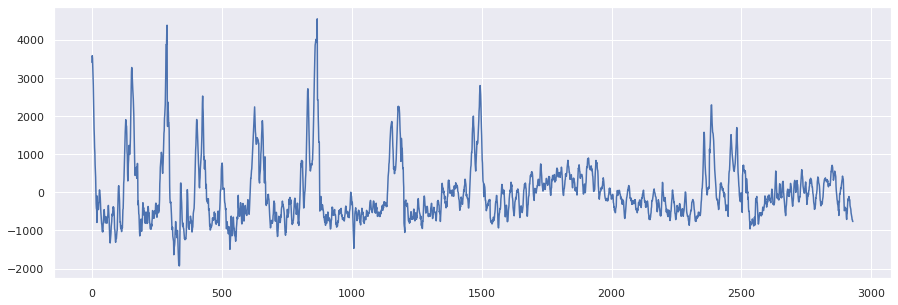

In [29]:
neuron = 'neuron_024'

plt.figure(figsize=(15,5))
y = df_imputed[neuron]
plt.plot(y)

/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/scipy/signal/signaltools.py:1475: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
/home/charles/anaconda3/envs/torch/lib/python3.7/site-packages/scipy/signal/signaltools.py:1475: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


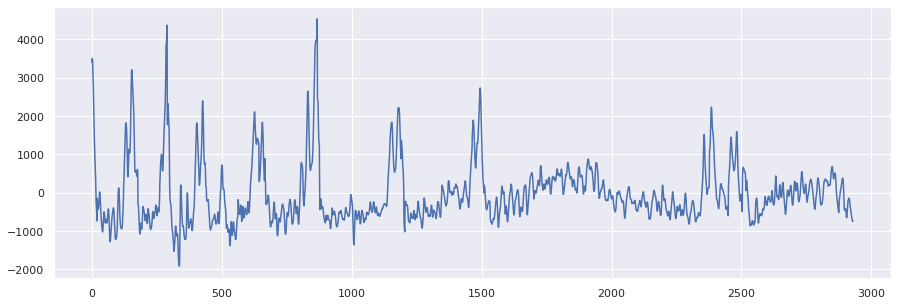

In [30]:

plt.figure(figsize=(15,5))
plt.plot(wiener(y))

In [31]:
from scipy import signal

Text(0.5, 0, 'f(Hz)')

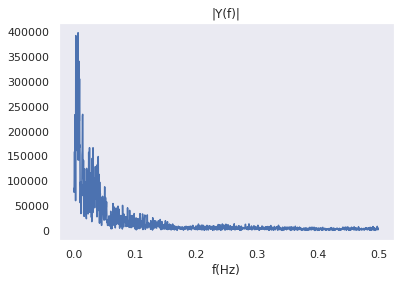

In [32]:
# From: https://bechelli.org/signal-and-filter-bandstop.html
sampling_rate = 1

Y = np.abs(np.fft.fft(y))
f = np.arange(0, len(Y)) * sampling_rate/len(Y)
df = int(0.5 * len(y) / sampling_rate)

plt.plot(f[:df], Y[:df])
plt.title('|Y(f)|')
plt.grid()
plt.xlabel('f(Hz)')

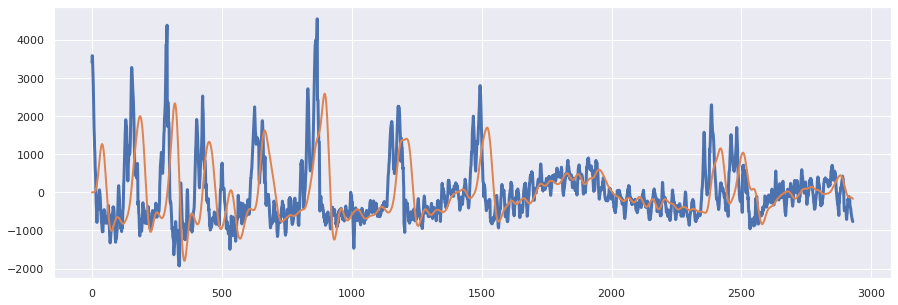

In [33]:
sos = signal.butter(6, 0.02, fs=1.0, output='sos')
y_filtered = signal.sosfilt(sos, np.array(y))

plt.figure(figsize=(15,5))
plt.plot(y, lw=3)
plt.plot(y_filtered, lw=2)

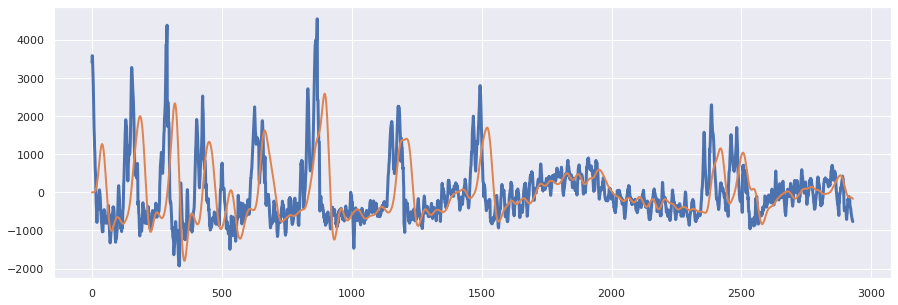

In [34]:
sos = signal.butter(6, 0.02, fs=1.0, output='sos')
y_filtered = signal.sosfilt(sos, np.array(y))

plt.figure(figsize=(15,5))
plt.plot(y, lw=3)
plt.plot(y_filtered, lw=2)

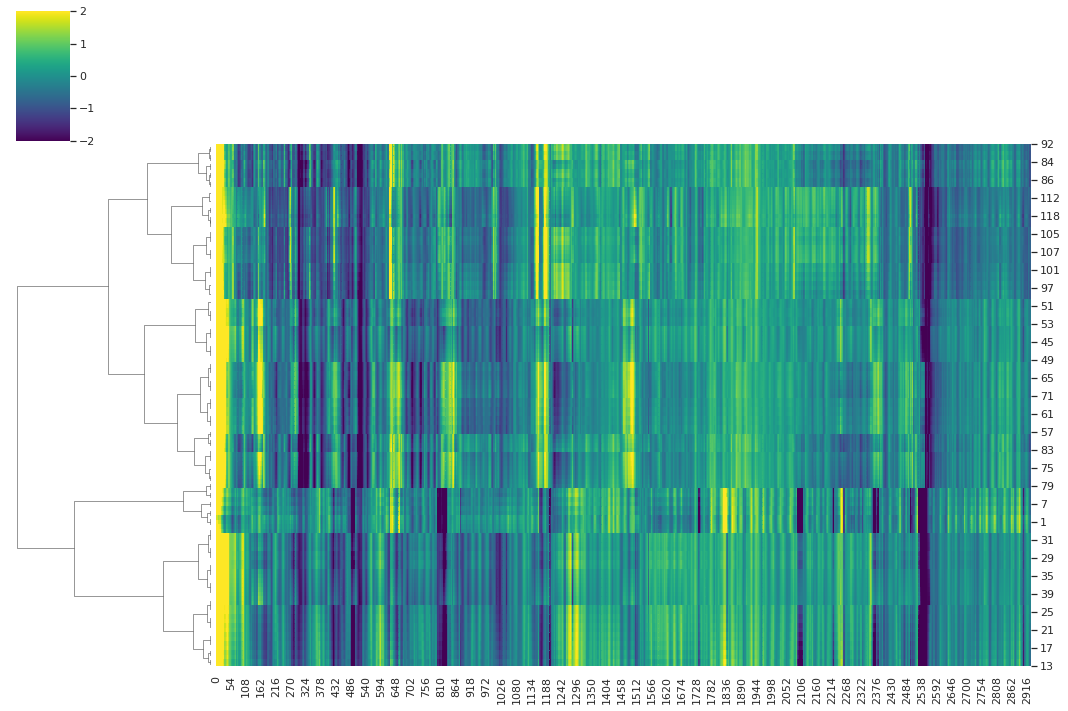

In [37]:
df_filtered = signal.sosfilt(sos, df_imputed)
g = sns.clustermap(df_filtered.T, col_cluster=False, vmin=-2, vmax=2,
                   metric="correlation", z_score=0, cmap='viridis', figsize=(15,10))

# Scratch: remove obvious outliers

In [34]:
neuron = 'neuron_056'

opt = dict(channel_mode='ratio', calculation_mode='integration')

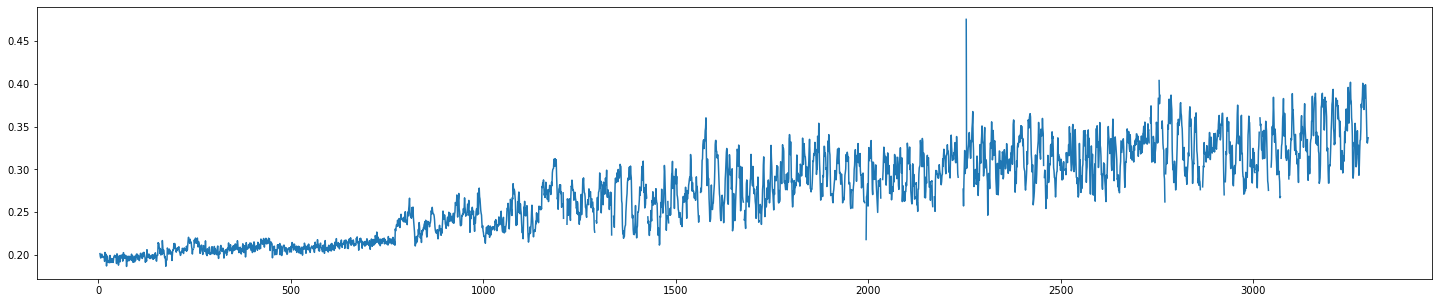

In [35]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)

Calculated error threshold at 0.024383447568854837


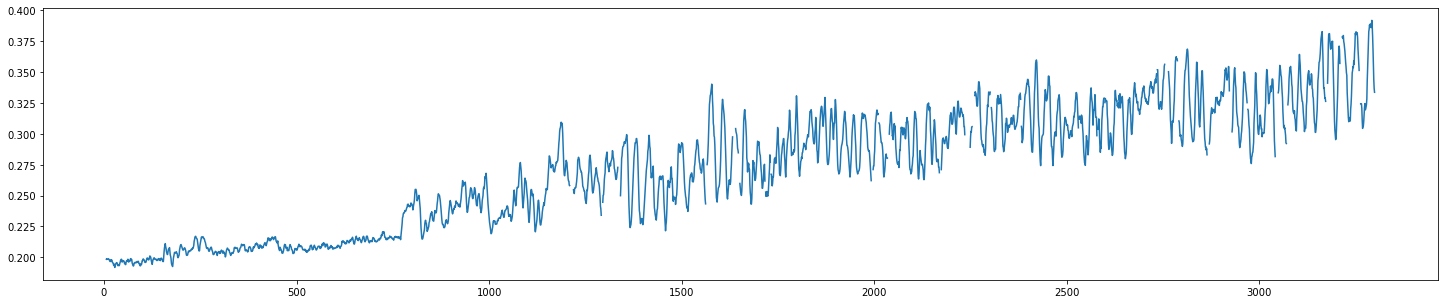

In [36]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt, remove_outliers=True, filter_mode='rolling_mean')
plt.plot(t, y)

# Scratch: do not remove spike-like signals

In [37]:
neuron = 'neuron_128'

opt = dict(channel_mode='ratio', calculation_mode='integration')

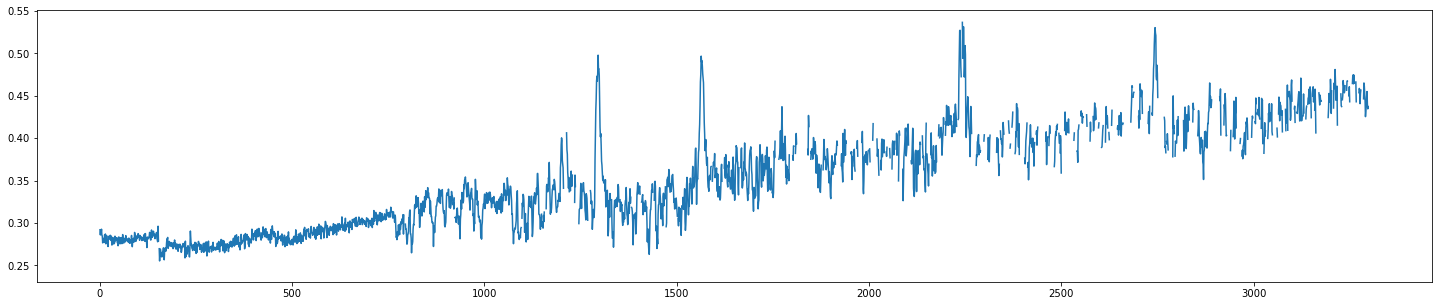

In [38]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt)
plt.plot(t, y)

Calculated error threshold at 0.023063265792468146


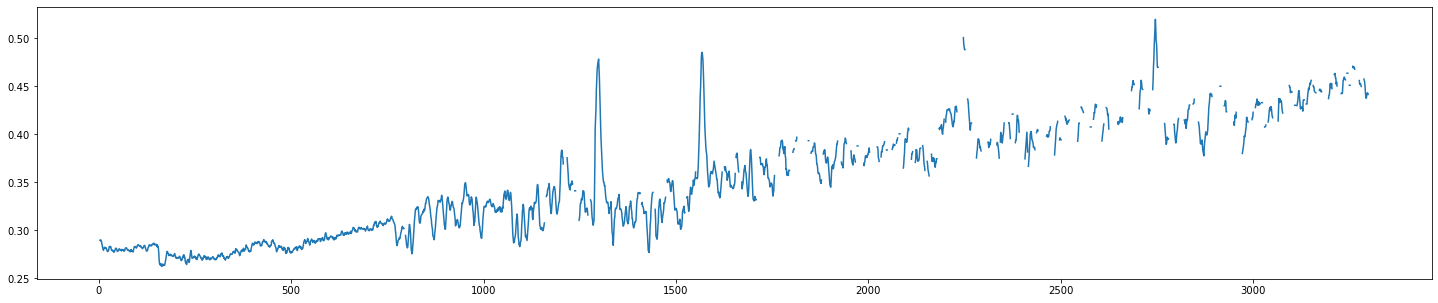

In [39]:
plt.figure(figsize=(25, 5))
t, y = project_data1.calculate_traces(neuron_name=neuron, **opt, remove_outliers=True, filter_mode='rolling_mean')
plt.plot(t, y)

# Scratch: delta f over f

In [152]:
y = project_data1.green_traces[neuron]['intensity_image']

In [157]:
np.nanquantile(y, 0.1)

55172.1